# Demo: Downloading Images using the Flickr API

For many machine learning problems, one needs to create training and testing datasets of images of particular classes.  The [ImageNet site](http://www.image-net.org/) has an enormous set of images of 1000 different classes with bounding boxes.  But, this set may not have the exact image classes you are looking for.  An alternative way to generate image datasets is via the [Flickr API](https://stuvel.eu/flickrapi-doc/), which gives you access to millions of images in the Flickr database.

In this demo, you will learn to:
* Load images from the Flickr API
* Resize images to a desired shape
* Save images to files

## Installing standard packages

First we import some standard packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io
import skimage.transform
import urllib
import requests
from io import BytesIO

## Installing and Loading the Flickr API package

The [Flickr API](https://stuvel.eu/flickrapi-doc/) provides a simple python interface.  You can install it via

    pip install flickrapi
   
Do NOT install via `conda install -c auto flickrapi`!! You can validate the installation by importing the package.

In [2]:
import flickrapi

To use the Flickr API, you need to apply for the keys below.  You can do this on the [Flickr website](https://www.flickr.com/services/api/misc.api_keys.html).  Once you have the keys, they can be set as follows.

In [3]:
api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
api_secret = 'xxxxxxxxxxxxxxxx'

flickr = flickrapi.FlickrAPI(api_key, api_secret)

## Loading the Images
The `flickr.walk()` function provides a generator of URLs for photos with a particular `keyword`.  To illustrate the method, we will get a number of images of elephants.

In [4]:
keyword = 'elephant'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

Next, we create a routine for displaying images.

In [5]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

Now we prepare two directories to save the downloaded images, one for training images and one for testing images.

In [6]:
import os

# declare directory names
train_dir = 'train'
test_dir = 'test'
image_dir = keyword

# make a directories for the training and testing images
for root_dir in [train_dir,test_dir]:
    dir_path = root_dir + '/' + image_dir

    # check if data exists
    if not os.path.isdir(root_dir):
        os.mkdir(root_dir)
    if not os.path.isdir(dir_path):
        os.mkdir(dir_path)
        print("Making directory %s" % dir_path)
    else:
        print("Will store %s images in directory %s" %(root_dir,dir_path))

Will store train images in directory train/elephant
Will store test images in directory test/elephant


Now, we walk through the flickr database and download/save the image files.  First we'll download the training images, and later the testing images.

Note that the code below can result in errors if the connection to flickr.com is too slow.  In that case, try again later.

In [7]:
import warnings
from random import seed
from random import random
    
ntrain = 10 # number of training images to download
ntest = 10 # number of testing images to download

nrow = 224 # image dimension 1
ncol = 224 # image dimension 2

# download images, first train then test
seed(1) # make repeatable
itrain = 0 # initialize counter
itest = 0 # initialize counter
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Set the directory randomly 
        #if (random()< ntrain/(ntrain+ntest)):
        if (random()< (ntrain-itrain)/(ntrain-itrain + ntest-itest + 1e-15)):
            if (itrain<ntrain):
                dir_path = train_dir + '/' + image_dir
                i = itrain
                itrain = itrain + 1
            elif (itest<ntest):
                dir_path = test_dir + '/' + image_dir
                i = itest
                itest = itest + 1
            else:
                break
        else:
            if (itest<ntest):
                dir_path = test_dir + '/' + image_dir
                i = itest
                itest = itest + 1
            elif (itrain<ntrain):
                dir_path = train_dir + '/' + image_dir
                i = itrain
                itrain = itrain + 1
            else:
                break            
    
        # Save the image
        local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_path,keyword,i)  
        skimage.io.imsave(local_name, im2)      
        print(local_name)        

/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0000.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0000.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0001.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0001.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0002.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0003.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0002.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0003.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0004.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0005.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0004.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0006.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0005.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0007.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0006.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0007.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0008.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0008.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


test/elephant/elephant_0009.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


train/elephant/elephant_0009.jpg


/Users/schniter.1/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Finally we plot some of the saved training images.  Some of them may be slightly distorted since the re-shaping could have changed the aspect ratio.

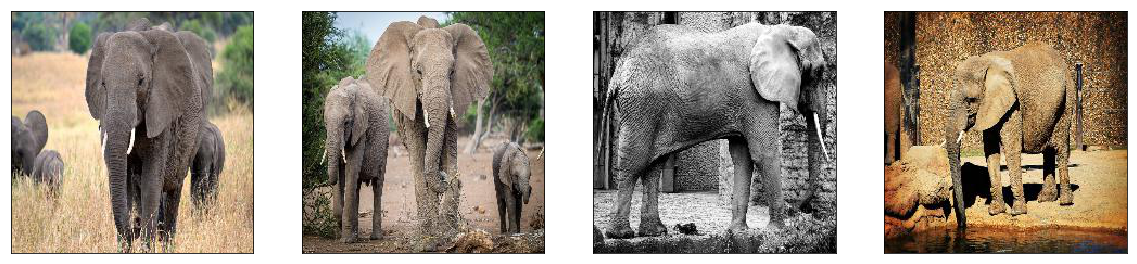

In [8]:
dir_path = train_dir + '/' + image_dir
plt.figure(figsize=(20,20))
nplot = 4
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_path,keyword, i)  
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)

And let's also plot some of the saved testing images.  Note that they are different from the training images.

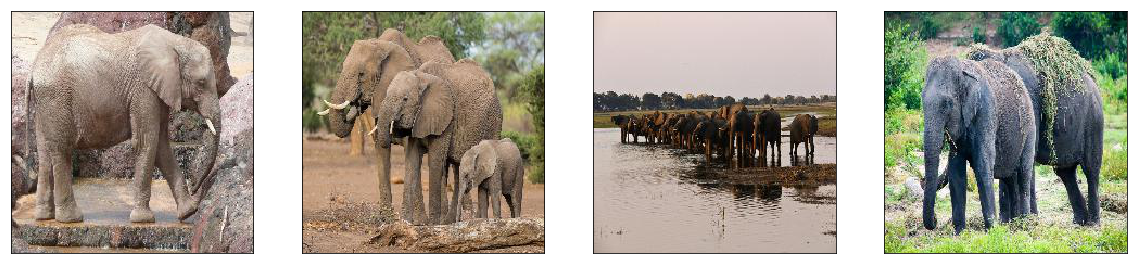

In [9]:
dir_path = test_dir + '/' + image_dir
plt.figure(figsize=(20,20))
nplot = 4
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_path,keyword, i)  
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)